In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sklearn.tree import DecisionTreeRegressor
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from math import sqrt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
df = pd.read_csv('../Manhattan_Noise.csv')
df

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Date
0,1,35139300,2017-01-01 00:03:41,2017-01-01 03:49:13,Noise - Residential,Loud Music/Party,Residential Building/House,10040.0,60 THAYER STREET,THAYER STREET,...,1004393.0,253922.0,MOBILE,40.863609,-73.927177,"(40.8636089229268, -73.92717651087838)",0,1,6,2017-01-01
1,14,35136997,2017-01-01 00:14:06,2017-01-01 02:22:14,Noise - Commercial,Loud Music/Party,Store/Commercial,10011.0,235 WEST 23 STREET,WEST 23 STREET,...,985149.0,210546.0,PHONE,40.744577,-73.996756,"(40.744576681504476, -73.99675563032027)",0,1,6,2017-01-01
2,20,35138402,2017-01-01 00:17:37,2017-01-01 06:02:22,Noise - Residential,Loud Music/Party,Residential Building/House,10031.0,520 WEST 139 STREET,WEST 139 STREET,...,997751.0,238682.0,ONLINE,40.821792,-73.951220,"(40.82179224368313, -73.951220174454)",0,1,6,2017-01-01
3,23,35140901,2017-01-01 00:18:10,2017-01-01 05:43:30,Noise - Residential,Loud Music/Party,Residential Building/House,10027.0,128 WEST 128 STREET,WEST 128 STREET,...,999451.0,234426.0,ONLINE,40.810108,-73.945088,"(40.81010795620323, -73.94508762577884)",0,1,6,2017-01-01
4,27,35138792,2017-01-01 00:20:10,2017-01-01 01:30:49,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10019.0,NaN,NaN,...,990833.0,218234.0,PHONE,40.765676,-73.976235,"(40.76567588066998, -73.97623531488374)",0,1,6,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139632,446231,38057939,2017-12-30 23:54:20,2017-12-31 03:56:50,Noise - Commercial,Loud Music/Party,Store/Commercial,10031.0,3660 BROADWAY,BROADWAY,...,998760.0,241804.0,MOBILE,40.830360,-73.947568,"(40.830359643502725, -73.94756785332217)",23,12,5,2017-12-30
139633,446235,38058042,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,...,999270.0,235411.0,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,2017-12-30
139634,446240,38062803,2017-12-30 23:58:23,2017-12-31 12:31:59,Noise - Residential,Loud Music/Party,Residential Building/House,10040.0,97 ARDEN STREET,ARDEN STREET,...,1004010.0,254128.0,ONLINE,40.864175,-73.928561,"(40.86417519602294, -73.92856057230655)",23,12,5,2017-12-30
139635,446241,38060662,2017-12-30 23:59:44,2017-12-31 12:54:27,Noise - Residential,Banging/Pounding,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,...,991394.0,228839.0,MOBILE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,2017-12-30


In [3]:
df = df[df["Descriptor"] != "Loud Music/Party"]

In [4]:
df = df.drop(columns=["Date","Unnamed: 0","Unique Key"])

In [5]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week
6,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,MANHATTAN,1005384.0,255104.0,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6
11,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,MANHATTAN,990871.0,222424.0,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6
16,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,MANHATTAN,993376.0,219485.0,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6
20,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,MANHATTAN,997999.0,228859.0,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6
21,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,MANHATTAN,1003522.0,249040.0,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139617,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,MANHATTAN,991394.0,228839.0,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5
139624,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,MANHATTAN,983825.0,202474.0,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5
139629,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,MANHATTAN,1005613.0,254344.0,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5
139633,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,MANHATTAN,999270.0,235411.0,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5


In [6]:
df['Day of Week'].value_counts()

Day of Week
5    12289
2    11074
3    10558
1    10236
6    10232
4    10064
0     9487
Name: count, dtype: int64

In [7]:
df.isna().sum()

Created Date                          0
Closed Date                         763
Complaint Type                        0
Descriptor                            0
Location Type                     28982
Incident Zip                        269
Incident Address                  13406
Street Name                       13406
Cross Street 1                    12667
Cross Street 2                    12682
Intersection Street 1             60492
Intersection Street 2             60492
Address Type                         11
City                                269
Resolution Action Updated Date      653
BBL                               17903
Borough                               0
X Coordinate (State Plane)          659
Y Coordinate (State Plane)          659
Open Data Channel Type                0
Latitude                            659
Longitude                           659
Location                            659
Hour                                  0
Month                                 0


In [8]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

### Filling missing values was more beneficial than dropping all rows containing na values

In [9]:
df.isna().sum()

Created Date                          0
Closed Date                         763
Complaint Type                        0
Descriptor                            0
Location Type                     28982
Incident Zip                        269
Incident Address                  13406
Street Name                       13406
Cross Street 1                    12667
Cross Street 2                    12682
Intersection Street 1             60492
Intersection Street 2             60492
Address Type                         11
City                                269
Resolution Action Updated Date      653
BBL                               17903
Borough                               0
X Coordinate (State Plane)          659
Y Coordinate (State Plane)          659
Open Data Channel Type                0
Latitude                              0
Longitude                             0
Location                            659
Hour                                  0
Month                                 0


In [10]:
df['Weekend'] = df['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

In [11]:
df['Weekday'] = df['Day of Week'].apply(lambda x: 1 if x < 5 else 0)

In [12]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday
6,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,255104.0,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0
11,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,222424.0,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0
16,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,219485.0,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0
20,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,228859.0,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0
21,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,249040.0,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139617,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,228839.0,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0
139624,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,202474.0,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0
139629,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,254344.0,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0
139633,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,235411.0,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0


=========================================

# DBSCAN Clustering

In [13]:
df_dbscan = df.copy()

In [14]:
earth_perimeter = 40070000  # earth perimeter in meters
eps_in_meters = 500  
eps = eps_in_meters / earth_perimeter  # 500m in degrees

In [15]:
coords = df_dbscan[['Latitude', 'Longitude']].values

In [16]:
db = DBSCAN(eps=eps, min_samples=100, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [17]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [18]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 120
Estimated number of noise points: 44027


In [19]:
df_dbscan['Cluster'] = db.labels_

In [20]:
df_dbscan

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster
6,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0,-1
11,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0,-1
16,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0,-1
20,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0,-1
21,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139617,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0,28
139624,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0,-1
139629,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0,24
139633,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0,7


In [21]:
unique_clusters = df_dbscan['Cluster'].unique()
print(f"Number of unique clusters: {len(unique_clusters)}")

Number of unique clusters: 121


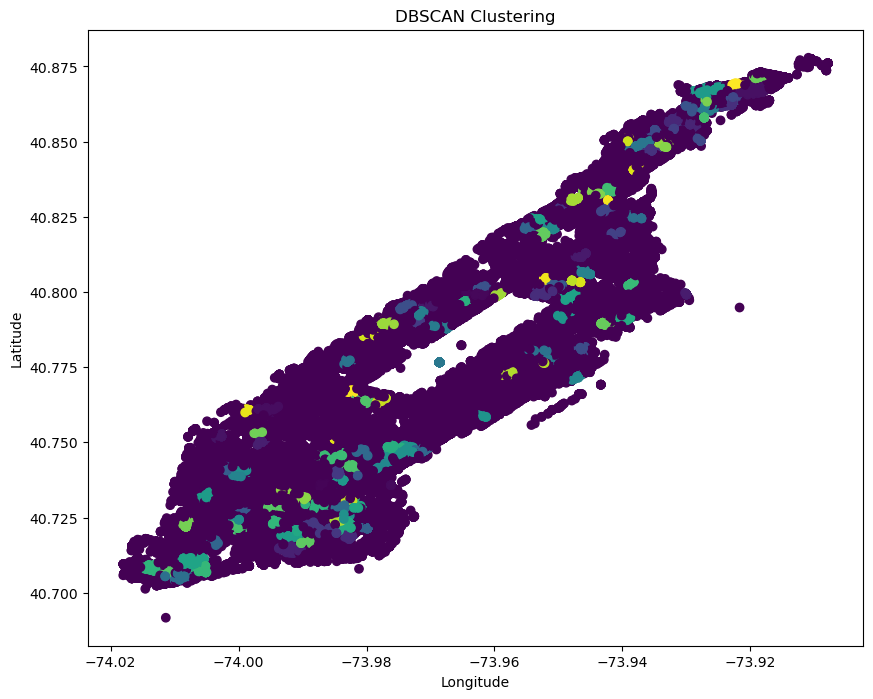

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(df_dbscan['Longitude'], df_dbscan['Latitude'], c=df_dbscan['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')

plt.show()

In [23]:
manhattan_map = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

filtered_df = df_dbscan[df_dbscan['Cluster'] != -1]

heatmap_data = filtered_df[['Latitude', 'Longitude']].values
heat_map = HeatMap(heatmap_data)

heat_map.add_to(manhattan_map)

manhattan_map

### Clusters are not optimal for covering all sections of central Manhattan 

# OPTICS Clustering

In [24]:
coords = df[['Latitude', 'Longitude']].values

In [25]:
optics_model = OPTICS(min_samples=100, metric='haversine')

In [26]:
optics_model.fit(np.radians(coords))

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(metric='haversine', min_samples=100)

In [27]:
labels = optics_model.labels_

In [28]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [29]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 166
Estimated number of noise points: 41887


In [31]:
df['Cluster'] = labels

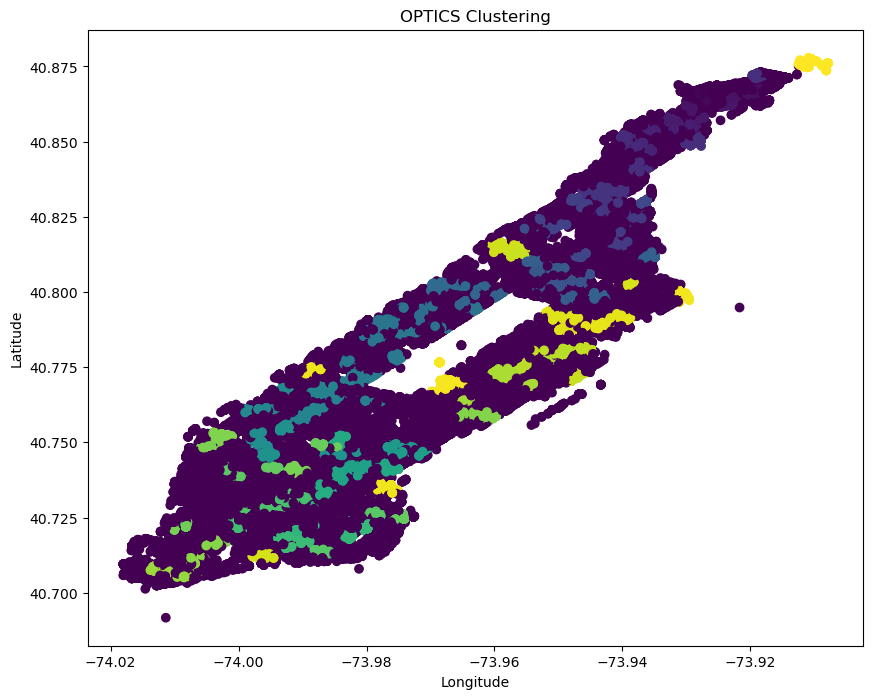

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('OPTICS Clustering')

plt.show()

In [33]:
manhattan_map = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

filtered_optics = df[df['Cluster'] != -1]

heatmap_data = filtered_optics[['Latitude', 'Longitude']].values
heat_map = HeatMap(heatmap_data)

heat_map.add_to(manhattan_map)

manhattan_map

#### From the onset, OPTICS seems to develop a more detailed approach to clustering the longitude and latitude values within the dataset 
* The fact the model is creating based off the most optimal distance between longitude and latitude values led us to believe OPTICS was the best approach to clustering complaints within Manhattan
* However as can be seen above, the clusters contain a lot of bare spots around Manhattan which is not ideal for our approach to the application

In [34]:
complaint_counts = df.groupby(['Cluster', 'Hour', 'Weekday', 'Weekend']).size().reset_index(name='Noise Complaint Count')

In [35]:
df = df.merge(complaint_counts, on=['Cluster', 'Hour', 'Weekday', 'Weekend'], how='left')

In [36]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Latitude,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0,-1,1121
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0,67,4
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0,163,2
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0,-1,1121
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0,-1,1121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0,60,7
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0,-1,952
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0,7,11
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0,33,13


In [37]:
df_cluster = df[df['Cluster'] == 330]
df_cluster

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Latitude,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count


=========================================

In [38]:
df['Noise Complaint Count'] = df.groupby(['Cluster', 'Hour', 'Weekend', 'Weekday'])['Complaint Type'].transform('count')

In [39]:
df['Noise Complaint Count'].unique()

array([1121,    4,    2,    5,    7,  913,    1,   11,  549,    3,    6,
        414,  363,  190,  189,    8,  574,  776,  598,  477,  383,  348,
        391,  329,  390,   12,  439,  442,   21,  502,  637,  856,   18,
         19,  952,   24, 2257,   10,  103,   27,   15, 1773,   22, 1075,
        127,  713,   25,    9,  850,  970,  954,  912,  902,  699,  758,
        738,  724,  790,  733,  981, 1223, 1583, 2278,   16, 3036,   13,
         20,   47, 3318,   32,   33,   40,   23,   80,  559,  892,   53,
         55,   50,   14,   31,   36,   63,   60,   37,   92,   26,  640,
        180,   17,   39,   29,   44,   64,  322,  374,   42,   35,   43,
         48,   38,   49,   54,   93,   84,   51,   28,   30,   52,   74,
         34,  164,   46,   61,   67,   78,   73,  154,   41,   57])

In [40]:
bins = [0, 500, 1000, 1500, 2000, np.inf]

In [41]:
labels = [0, 1, 2, 3, 4]

In [42]:
df['Noise Complaint Category'] = pd.cut(df['Noise Complaint Count'], bins=bins, labels=labels)

In [43]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0,-1,1121,2
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0,67,4,0
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0,163,2,0
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0,-1,1121,2
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0,-1,1121,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0,60,7,0
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0,-1,952,1
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0,7,11,0
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0,33,13,0


In [44]:
# Filter the dataframe
df_filtered = df[(df['Noise Complaint Category'] == 4)]
df_filtered

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category
101,2017-01-02 00:07:31,2017-01-02 12:43:35,Noise - Residential,Loud Television,Residential Building/House,10030.0,259 WEST 144 STREET,WEST 144 STREET,7 AVENUE,8 AVENUE,...,-73.941205,"(40.82166680437474, -73.94120490161045)",0,1,0,0,1,-1,2257,4
108,2017-01-02 00:50:00,2017-01-04 01:45:00,Noise,Noise: Construction Before/After Hours (NM1),NaN,10002.0,NaN,NaN,NaN,NaN,...,-73.988639,"(40.722933781818995, -73.98863937450832)",0,1,0,0,1,-1,2257,4
109,2017-01-02 00:51:00,2017-01-04 01:00:00,Noise,Noise: Construction Before/After Hours (NM1),NaN,10003.0,NaN,NaN,NaN,NaN,...,-73.990342,"(40.72493212081157, -73.99034191604916)",0,1,0,0,1,-1,2257,4
110,2017-01-02 00:51:00,2017-01-04 01:00:00,Noise,Noise: Construction Before/After Hours (NM1),NaN,10003.0,NaN,NaN,NaN,NaN,...,-73.989869,"(40.72558258764235, -73.9898691952011)",0,1,0,0,1,-1,2257,4
112,2017-01-02 00:58:00,2017-01-04 01:00:00,Noise,Noise: Construction Before/After Hours (NM1),NaN,10003.0,26 2 AVENUE,2 AVENUE,E 1 ST,E 2 ST,...,-73.990613,"(40.72454238764723, -73.99061255604289)",0,1,0,0,1,-1,2257,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73820,2017-12-29 23:27:39,2017-12-30 01:30:44,Noise - Vehicle,Engine Idling,Street/Sidewalk,10025.0,NaN,NaN,NaN,NaN,...,-73.966700,"(40.80416840751694, -73.96670008656616)",23,12,4,0,1,-1,3318,4
73821,2017-12-29 23:31:19,2017-12-30 12:04:22,Noise - Residential,Banging/Pounding,Residential Building/House,10012.0,WEST 3 STREET,WEST 3 STREET,THOMPSON STREET,SULLIVAN STREET,...,-73.998986,"(40.729870338113514, -73.99898613272266)",23,12,4,0,1,-1,3318,4
73822,2017-12-29 23:40:08,2017-12-30 09:34:45,Noise - Commercial,Car/Truck Music,Store/Commercial,10034.0,101 SHERMAN AVENUE,SHERMAN AVENUE,DYCKMAN STREET,ACADEMY STREET,...,-73.925231,"(40.863851956918054, -73.92523119238143)",23,12,4,0,1,-1,3318,4
73824,2017-12-29 23:47:50,2017-12-30 09:24:37,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10033.0,541 WEST 180 STREET,WEST 180 STREET,AUDUBON AVENUE,ST NICHOLAS AVENUE,...,-73.933143,"(40.84817358504047, -73.93314285449081)",23,12,4,0,1,-1,3318,4


In [45]:
df_cluster = df[["Cluster"]]
df_cluster['Cluster'].unique()

array([ -1,  67, 163, 126,  52, 161,  77,  26,   5, 133,  59,  33,  45,
       121, 162,  56,  81, 113,  12,  34, 155,  11,  48,  22, 108, 154,
        82,  75, 142,   9,  16, 144,  41, 152,   6,  97,  64,  53,  57,
        13,  27, 109,  25,  74,   7,  21,  23,  68,  14,  19, 150,  60,
         8, 106,  95,  65,  42, 123, 138, 110, 102, 134, 145,  38, 135,
        76,  92,  99,  87,  86,  73,  63,  72,  50,  93, 149, 158,  66,
        17, 164, 146,  61,  58, 104, 147,  40, 124, 151,  98,  32, 153,
        94, 115,  79, 159,  89,  85,  28,  69, 157,  96,   1, 111,  31,
        20,  47,  29,  44, 156, 107, 165, 140, 137, 148,  88,  90,  24,
        10,  54,  35, 131, 125, 136, 100, 116,   0, 122,  91,  46,  43,
       120, 132,  37, 143, 160,  70, 114,  49, 141, 118, 103, 112,  15,
        55,  39,  80,  18, 129, 128,   2,  36,  62,  51, 117, 105,  83,
       127,   4, 130, 119,  71,  30,  84, 139, 101,   3,  78])

In [46]:
df_filtered = df_filtered[["Noise Complaint Count"]]
df_filtered

,Noise Complaint Count
101,2257
108,2257
109,2257
110,2257
112,2257
...,...
73820,3318
73821,3318
73822,3318
73824,3318


In [47]:
df_filtered.value_counts()

Noise Complaint Count
3318                     3318
3036                     3036
2278                     2278
2257                     2257
Name: count, dtype: int64

#### Too many -1 Clusters leading to imbalance with the binning values
* The lack of coverage for clusters around Manhattan has led us away from OPTICS even though it's method of optimal distancing is considered the greatest
* We want to create more clusters to increase the coverage and the accuracy for 'busyness' of specific areas

## Test K Means Clustering to create more clusters

In [48]:
coords = df[['Longitude','Latitude']].values

In [49]:
n_clusters = 500

In [50]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

In [51]:
df['Cluster'] = kmeans.fit_predict(coords)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0,76,1121,2
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0,199,4,0
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0,96,2,0
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0,318,1121,2
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0,439,1121,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0,325,7,0
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0,288,952,1
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0,280,11,0
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0,197,13,0


In [53]:
df['Noise Complaint Count'] = df.groupby(['Cluster', 'Hour', 'Weekend', 'Weekday'])['Complaint Type'].transform('count')

In [54]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0,76,6,2
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0,199,4,0
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0,96,2,0
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0,318,8,2
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0,439,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0,325,9,0
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0,288,1,1
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0,280,7,0
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0,197,12,0


In [55]:
df_cluster = df[["Cluster"]]
df_cluster['Cluster'].unique()

array([ 76, 199,  96, 318, 439, 117, 437, 349, 153, 138, 259,  32, 129,
       251, 369, 411,  44, 293, 468, 454,  25, 197,  70,  99,  37, 352,
       110,  90, 438, 374, 266, 426, 112, 479,   7, 228, 480, 176, 253,
        34, 477, 145, 158, 409, 359,  74, 308,  53, 122, 132, 371, 373,
       455, 280, 191, 285, 123, 298, 353, 387, 287, 375, 179, 302,  24,
       425,   8, 448, 221, 327, 365, 231, 322, 182,  11, 244, 418, 402,
       296, 195,  77, 400, 282,  28, 137,  63,  85, 255, 136, 116, 339,
       303, 457, 170, 340,  18, 459, 127, 102, 292,  17,  84, 101, 279,
       386, 157, 486, 220, 488,  46, 165, 169, 151, 124, 364, 449,   9,
       424,  19,  81, 142, 167,  16, 408, 130, 470, 472, 230, 348, 392,
       432, 442,  64,  38, 325,   0, 434, 291, 482, 410,  23, 261, 166,
       211, 403, 461, 150, 436, 297, 427, 483, 489, 134, 380, 185, 412,
       241,  20, 361, 444, 354, 248, 263,  48, 399,  65, 416, 290, 334,
       133, 330, 406,  91, 499, 441, 471, 249, 332,  69, 358, 18

In [56]:
df_filtered = df[["Noise Complaint Count"]]
df_filtered.max()

Noise Complaint Count    181
dtype: int64

In [57]:
df_filtered.value_counts()

Noise Complaint Count
3                        7722
2                        7500
4                        6944
5                        5815
1                        5240
                         ... 
53                         53
50                         50
46                         46
45                         45
38                         38
Name: count, Length: 75, dtype: int64

In [58]:
# max_value = df['Noise Complaint Count'].max()

In [59]:
# bins = list(range(0, int(max_value) + 4, 4)) + [np.inf]

In [60]:
# labels = list(range(len(bins) - 1))

In [61]:
# df['Noise Complaint Category'] = pd.cut(df['Noise Complaint Count'], bins=bins, labels=labels)

In [62]:
# Create binning values for 25 noise complaint categories to ensure equal distributions 
df['Noise Complaint Category'] = pd.qcut(df['Noise Complaint Count'], q=50, labels=False, duplicates='drop')

In [63]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Longitude,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0,76,6,4
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0,199,4,2
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0,96,2,0
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0,318,8,6
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0,439,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0,325,9,7
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0,288,1,0
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0,280,7,5
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0,197,12,10


In [64]:
df['Noise Complaint Category'].value_counts()

Noise Complaint Category
0     12740
1      7722
2      6944
3      5815
4      5112
5      4207
6      3344
7      3033
8      2620
16     2075
9      2068
12     1750
11     1716
18     1610
21     1550
10     1524
22     1499
20     1388
23     1370
13     1350
17     1141
19     1136
15     1122
14     1104
Name: count, dtype: int64

In [65]:
df['Noise Complaint Category'].nunique()

24

## Check the value count for complaint categories to ensure all complaints aren't late in the evening

In [66]:
new_df = df[df['Noise Complaint Category'] == 24]

In [67]:
new_df['Hour'].value_counts()

Series([], Name: count, dtype: int64)

## Create the Model for Regression Capabilities

In [68]:
df['Final Noise Complaint Category'] = df['Noise Complaint Category'] / 25

In [69]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category,Final Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0,76,6,4,0.16
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0,199,4,2,0.08
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0,96,2,0,0.00
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0,318,8,6,0.24
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0,439,2,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0,325,9,7,0.28
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0,288,1,0,0.00
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0,280,7,5,0.20
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0,197,12,10,0.40


In [70]:
hour_test = df[df["Cluster"] == 110]

In [71]:
hour_test['Hour'].value_counts()

Hour
23    21
0     21
22    18
1     11
21     8
19     7
20     6
12     5
18     4
17     4
9      4
8      4
6      3
5      3
3      3
15     3
7      3
14     1
11     1
16     1
4      1
2      1
10     1
13     1
Name: count, dtype: int64

In [72]:
hour_test['Hour'].nunique()

24

***

## Merge with Crime output

In [80]:
crime_data = pd.read_csv("../Crime_Data_Model.csv")
crime_data

,Unnamed: 0,Latitude,Longitude,Hour,DayOfWeek,Cluster,CrimeCount_binned_regression
0,0,40.737203,-73.983273,3,6,20,0.533333
1,1,40.800930,-73.941098,22,4,307,0.466667
2,2,40.765024,-73.984836,2,6,364,0.533333
3,3,40.828623,-73.943849,20,1,33,0.533333
4,4,40.851213,-73.935216,22,5,413,0.266667
...,...,...,...,...,...,...,...
31240,31240,40.840781,-73.936245,17,2,445,0.866667
31241,31241,40.737203,-73.983273,22,3,451,0.333333
31242,31242,40.815913,-73.945149,15,0,222,0.666667
31243,31243,40.828623,-73.943849,17,4,81,0.866667


In [81]:
crime_data = crime_data.drop(columns=["Unnamed: 0"])

In [82]:
crime_data

,Latitude,Longitude,Hour,DayOfWeek,Cluster,CrimeCount_binned_regression
0,40.737203,-73.983273,3,6,20,0.533333
1,40.800930,-73.941098,22,4,307,0.466667
2,40.765024,-73.984836,2,6,364,0.533333
3,40.828623,-73.943849,20,1,33,0.533333
4,40.851213,-73.935216,22,5,413,0.266667
...,...,...,...,...,...,...
31240,40.840781,-73.936245,17,2,445,0.866667
31241,40.737203,-73.983273,22,3,451,0.333333
31242,40.815913,-73.945149,15,0,222,0.666667
31243,40.828623,-73.943849,17,4,81,0.866667


In [83]:
crime_data = crime_data.rename(columns={'DayOfWeek': 'Day of Week'})
crime_data

,Latitude,Longitude,Hour,Day of Week,Cluster,CrimeCount_binned_regression
0,40.737203,-73.983273,3,6,20,0.533333
1,40.800930,-73.941098,22,4,307,0.466667
2,40.765024,-73.984836,2,6,364,0.533333
3,40.828623,-73.943849,20,1,33,0.533333
4,40.851213,-73.935216,22,5,413,0.266667
...,...,...,...,...,...,...
31240,40.840781,-73.936245,17,2,445,0.866667
31241,40.737203,-73.983273,22,3,451,0.333333
31242,40.815913,-73.945149,15,0,222,0.666667
31243,40.828623,-73.943849,17,4,81,0.866667


In [84]:
crime_data["CrimeCount_binned_regression"].nunique()

15

In [85]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Location,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category,Final Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,"(40.86685083638424, -73.92358999813483)",0,1,6,1,0,76,6,4,0.16
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,"(40.777176308465414, -73.97609400658231)",0,1,6,1,0,199,4,2,0.08
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,"(40.769107291695136, -73.96705336575685)",0,1,6,1,0,96,2,0,0.00
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,"(40.794830448783166, -73.95034425614466)",0,1,6,1,0,318,8,6,0.24
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,"(40.850211242326274, -73.93033949342616)",0,1,6,1,0,439,2,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,"(40.79478336240544, -73.97419882396352)",23,12,5,1,0,325,9,7,0.28
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,"(40.72242106231787, -74.00153325775658)",23,12,5,1,0,288,1,0,0.00
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,"(40.86476431663921, -73.92276447154296)",23,12,5,1,0,280,7,5,0.20
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,"(40.81281181632886, -73.94573926927536)",23,12,5,1,0,197,12,10,0.40


In [86]:
df["Final Noise Complaint Category"].nunique()

24

In [87]:
merged_df = df.merge(crime_data, on=['Day of Week', 'Hour', 'Cluster'], how='left')

In [88]:
merged_df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category,Final Noise Complaint Category,Latitude_y,Longitude_y,CrimeCount_binned_regression
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,6,1,0,76,6,4,0.16,NaN,NaN,NaN
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,6,1,0,199,4,2,0.08,NaN,NaN,NaN
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,6,1,0,96,2,0,0.00,NaN,NaN,NaN
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,6,1,0,318,8,6,0.24,NaN,NaN,NaN
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,6,1,0,439,2,0,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96135,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,5,1,0,325,9,7,0.28,NaN,NaN,NaN
96136,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,5,1,0,288,1,0,0.00,NaN,NaN,NaN
96137,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,5,1,0,280,7,5,0.20,40.789463,-73.947634,0.0
96138,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,5,1,0,197,12,10,0.40,NaN,NaN,NaN


In [89]:
merged_df = merged_df.drop(columns=["Created Date","Closed Date","Complaint Type","Descriptor","Location Type","Incident Zip",
                        "Incident Address","Street Name","Cross Street 1","Cross Street 2","Intersection Street 1","Intersection Street 2",
                         "Address Type","City","Resolution Action Updated Date","BBL","Borough","X Coordinate (State Plane)","Y Coordinate (State Plane)",
                            "Open Data Channel Type","Location"])

In [90]:
merged_df

,Latitude_x,Longitude_x,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category,Final Noise Complaint Category,Latitude_y,Longitude_y,CrimeCount_binned_regression
0,40.866851,-73.923590,0,1,6,1,0,76,6,4,0.16,NaN,NaN,NaN
1,40.777176,-73.976094,0,1,6,1,0,199,4,2,0.08,NaN,NaN,NaN
2,40.769107,-73.967053,0,1,6,1,0,96,2,0,0.00,NaN,NaN,NaN
3,40.794830,-73.950344,0,1,6,1,0,318,8,6,0.24,NaN,NaN,NaN
4,40.850211,-73.930339,0,1,6,1,0,439,2,0,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96135,40.794783,-73.974199,23,12,5,1,0,325,9,7,0.28,NaN,NaN,NaN
96136,40.722421,-74.001533,23,12,5,1,0,288,1,0,0.00,NaN,NaN,NaN
96137,40.864764,-73.922764,23,12,5,1,0,280,7,5,0.20,40.789463,-73.947634,0.0
96138,40.812812,-73.945739,23,12,5,1,0,197,12,10,0.40,NaN,NaN,NaN


In [91]:
merged_df = merged_df.drop(columns=["Latitude_y","Longitude_y"])
merged_df

,Latitude_x,Longitude_x,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category,Final Noise Complaint Category,CrimeCount_binned_regression
0,40.866851,-73.923590,0,1,6,1,0,76,6,4,0.16,NaN
1,40.777176,-73.976094,0,1,6,1,0,199,4,2,0.08,NaN
2,40.769107,-73.967053,0,1,6,1,0,96,2,0,0.00,NaN
3,40.794830,-73.950344,0,1,6,1,0,318,8,6,0.24,NaN
4,40.850211,-73.930339,0,1,6,1,0,439,2,0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
96135,40.794783,-73.974199,23,12,5,1,0,325,9,7,0.28,NaN
96136,40.722421,-74.001533,23,12,5,1,0,288,1,0,0.00,NaN
96137,40.864764,-73.922764,23,12,5,1,0,280,7,5,0.20,0.0
96138,40.812812,-73.945739,23,12,5,1,0,197,12,10,0.40,NaN


In [92]:
merged_df['CrimeCount_binned_regression'] = merged_df['CrimeCount_binned_regression'].fillna(0)

In [93]:
# merged_df['Combined_Score'] = (9 * merged_df['Final Noise Complaint Category'] + merged_df['CrimeCount_binned_regression']) / 10

In [94]:
def combine_scores(row):
    if row['CrimeCount_binned_regression'] > 0.4:
        return np.mean([row['Final Noise Complaint Category'], row['CrimeCount_binned_regression']])
    else:
        return row['Final Noise Complaint Category']

In [95]:
merged_df['Combined_Score'] = merged_df.apply(combine_scores, axis=1)

In [96]:
merged_df['Combined_Score'] = merged_df[['Final Noise Complaint Category', 'CrimeCount_binned_regression']].max(axis=1)

In [97]:
merged_df['Normalized_Score'] = merged_df['Combined_Score'] / merged_df['Combined_Score'].max()

In [98]:
merged_df

,Latitude_x,Longitude_x,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Noise Complaint Count,Noise Complaint Category,Final Noise Complaint Category,CrimeCount_binned_regression,Combined_Score,Normalized_Score
0,40.866851,-73.923590,0,1,6,1,0,76,6,4,0.16,0.0,0.16,0.171429
1,40.777176,-73.976094,0,1,6,1,0,199,4,2,0.08,0.0,0.08,0.085714
2,40.769107,-73.967053,0,1,6,1,0,96,2,0,0.00,0.0,0.00,0.000000
3,40.794830,-73.950344,0,1,6,1,0,318,8,6,0.24,0.0,0.24,0.257143
4,40.850211,-73.930339,0,1,6,1,0,439,2,0,0.00,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96135,40.794783,-73.974199,23,12,5,1,0,325,9,7,0.28,0.0,0.28,0.300000
96136,40.722421,-74.001533,23,12,5,1,0,288,1,0,0.00,0.0,0.00,0.000000
96137,40.864764,-73.922764,23,12,5,1,0,280,7,5,0.20,0.0,0.20,0.214286
96138,40.812812,-73.945739,23,12,5,1,0,197,12,10,0.40,0.0,0.40,0.428571


In [99]:
merged_df["Normalized_Score"].value_counts()

Normalized_Score
0.000000    12246
0.042857     7389
0.085714     6841
0.128571     5715
0.214286     5473
0.171429     5154
0.257143     3473
0.300000     3305
0.857143     3281
0.428571     3251
0.342857     2819
0.642857     2656
0.714286     2510
0.385714     2423
0.685714     2361
0.471429     2053
0.771429     2007
0.900000     1951
0.514286     1920
0.500000     1701
0.285714     1602
0.571429     1570
0.942857     1535
0.557143     1505
0.357143     1491
0.985714     1389
0.600000     1367
1.000000     1306
0.814286     1291
0.728571     1282
0.928571     1097
0.142857      940
0.785714      798
0.071429      438
Name: count, dtype: int64

In [100]:
merged_df["Normalized_Score"].nunique()

34

In [101]:
df = merged_df

In [102]:
df = df.rename(columns={'Longitude_x': 'Longitude','Latitude_x': 'Latitude'})

In [103]:
df = df.drop(columns=['Noise Complaint Count','Noise Complaint Category','Final Noise Complaint Category','CrimeCount_binned_regression','Combined_Score'])

In [104]:
df

,Latitude,Longitude,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Normalized_Score
0,40.866851,-73.923590,0,1,6,1,0,76,0.171429
1,40.777176,-73.976094,0,1,6,1,0,199,0.085714
2,40.769107,-73.967053,0,1,6,1,0,96,0.000000
3,40.794830,-73.950344,0,1,6,1,0,318,0.257143
4,40.850211,-73.930339,0,1,6,1,0,439,0.000000
...,...,...,...,...,...,...,...,...,...
96135,40.794783,-73.974199,23,12,5,1,0,325,0.300000
96136,40.722421,-74.001533,23,12,5,1,0,288,0.000000
96137,40.864764,-73.922764,23,12,5,1,0,280,0.214286
96138,40.812812,-73.945739,23,12,5,1,0,197,0.428571


In [105]:
df = df.drop_duplicates(subset=["Latitude","Longitude","Hour","Weekday","Weekend","Cluster"], keep='last')

In [106]:
df

,Latitude,Longitude,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Normalized_Score
0,40.866851,-73.923590,0,1,6,1,0,76,0.171429
1,40.777176,-73.976094,0,1,6,1,0,199,0.085714
2,40.769107,-73.967053,0,1,6,1,0,96,0.000000
3,40.794830,-73.950344,0,1,6,1,0,318,0.257143
4,40.850211,-73.930339,0,1,6,1,0,439,0.000000
...,...,...,...,...,...,...,...,...,...
96134,40.722062,-73.975840,23,12,5,1,0,215,1.000000
96136,40.722421,-74.001533,23,12,5,1,0,288,0.000000
96137,40.864764,-73.922764,23,12,5,1,0,280,0.214286
96138,40.812812,-73.945739,23,12,5,1,0,197,0.428571


***

## Model Building and Testing

In [107]:
X = df[['Longitude', 'Latitude', 'Hour', 'Weekday', 'Weekend']]
y = df['Normalized_Score']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
model = LinearRegression()

In [110]:
model.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test)

In [112]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.2178562823263278


In [113]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.10381709267899353


In [114]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 0.168484333197329


#### This may be an indicator to test other models to see if others may be more accurate 

In [115]:
from xgboost import XGBRegressor

models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}


In [116]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100

In [117]:
metrics = {
    "Model": [],
    "RMSE": [],
    "R-squared": [],
    "MAE": [],
    "MPE": [],
    "MAPE": [],
    "Training time": []
}

for model_name, model in models.items():
    start = time.time()
    
    model.fit(X_train, y_train)
    
    end = time.time()
    
    model_time = end - start
    
    y_pred = model.predict(X_test)
    
    model_rmse = sqrt(mean_squared_error(y_test, y_pred))
    model_r2 = r2_score(y_test, y_pred)
    model_mae = mean_absolute_error(y_test, y_pred)
    model_mpe = mean_percentage_error(y_test, y_pred)
    model_mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["RMSE"].append(model_rmse)
    metrics["R-squared"].append(model_r2)
    metrics["MAE"].append(model_mae)
    metrics["MPE"].append(model_mpe)
    metrics["MAPE"].append(model_mape)
    metrics["Training time"].append(model_time)
    
    print(f"{model_name}:\n- RMSE: {model_rmse}\n- R-squared: {model_r2}\n- MAE: {model_mae}\n- MPE: {model_mpe}\n- MAPE: {model_mape}\n- Training time: {model_time}\n")



Ridge:
- RMSE: 0.21784191799470273
- R-squared: 0.10393526823902599
- MAE: 0.16847551039520695
- MPE: -67.6085594177403
- MAPE: 109.95363019291726
- Training time: 0.013859748840332031

Lasso:
- RMSE: 0.2301483212552139
- R-squared: -0.00016603678203730432
- MAE: 0.1800434999110706
- MPE: -71.47985766649461
- MAPE: 112.86222059208053
- Training time: 0.005431175231933594

Decision Tree:
- RMSE: 0.15553639763639876
- R-squared: 0.5432058302405978
- MAE: 0.07050412673244899
- MPE: -14.597258387069584
- MAPE: 51.11494945004075
- Training time: 0.1378040313720703

Random Forest:
- RMSE: 0.12072588523448538
- R-squared: 0.7247943934346281
- MAE: 0.07451856675679885
- MPE: -21.86942862086253
- MAPE: 49.63034631712006
- Training time: 8.394852876663208

Gradient Boosting:
- RMSE: 0.17988089426352757
- R-squared: 0.3890206164579565
- MAE: 0.1334913404611321
- MPE: -47.918730631363395
- MAPE: 84.67736086584237
- Training time: 2.4097108840942383

XGBoost:
- RMSE: 0.14948416802148853
- R-squared

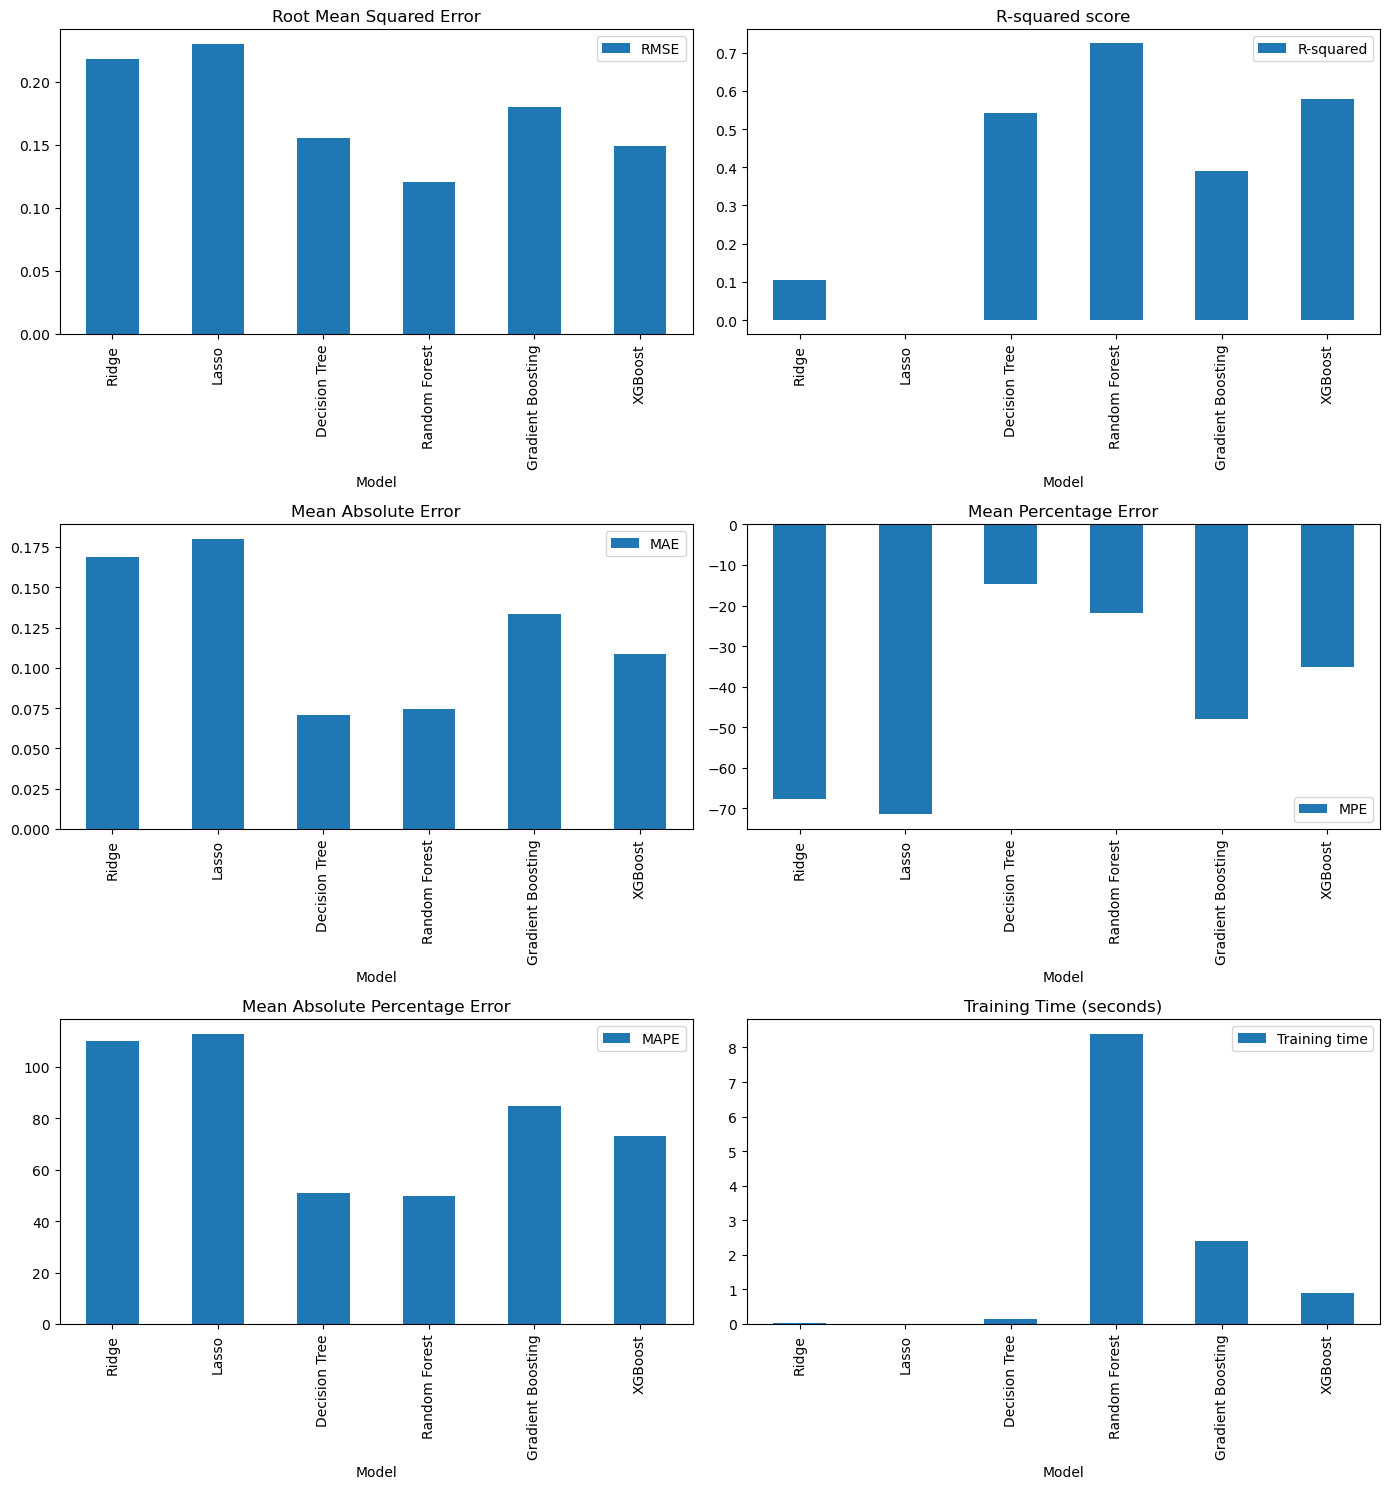

In [121]:
metrics_df = pd.DataFrame(metrics)

fig, ax = plt.subplots(3, 2, figsize=(14, 15))

metrics_df.plot(x="Model", y="RMSE", kind="bar", ax=ax[0, 0])
ax[0, 0].set_title("Root Mean Squared Error")

metrics_df.plot(x="Model", y="R-squared", kind="bar", ax=ax[0, 1])
ax[0, 1].set_title("R-squared score")

metrics_df.plot(x="Model", y="MAE", kind="bar", ax=ax[1, 0])
ax[1, 0].set_title("Mean Absolute Error")

metrics_df.plot(x="Model", y="MPE", kind="bar", ax=ax[1, 1])
ax[1, 1].set_title("Mean Percentage Error")

metrics_df.plot(x="Model", y="MAPE", kind="bar", ax=ax[2, 0])
ax[2, 0].set_title("Mean Absolute Percentage Error")

metrics_df.plot(x="Model", y="Training time", kind="bar", ax=ax[2, 1])
ax[2, 1].set_title("Training Time (seconds)")

plt.tight_layout()
plt.show()

#### Evident to see from the above metrics suggest that the Random Forest Regressor, as well as the Classifier model previously, is the most accurate model for our approach to modelling 
#### While saying this however, there is a huge contrast between the training time of the Random Forest Regressor and the Decision Tree Regressor - With this being said, I have decided to use the Decision Tree Regressor to enhance the performance based off runtime
* Below is the approach and further analysis of the model to ensure we have made the correct choice

## Decision Tree Regressor

In [119]:
dt_model = DecisionTreeRegressor(random_state=36)

In [120]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=36)

In [483]:
y_pred = dt_model.predict(X_test)

In [484]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [485]:
print("Decision Tree - Root Mean Squared Error (RMSE):", rmse)
print("Decision Tree - R-squared score:", r2)
print("Decision Tree - Mean absolute error:", mae)

Decision Tree - Root Mean Squared Error (RMSE): 0.15462227846920057
Decision Tree - R-squared score: 0.5485593970844325
Decision Tree - Mean absolute error: 0.06998173761626345


In [486]:
start_time = time.time()

dt_model = DecisionTreeRegressor(random_state=36)
dt_model = dt_model.fit(X_train, y_train)

end_time = time.time()

dt_time = end_time - start_time
print(f"Time taken to train Random Forest model : {dt_time} seconds")

Time taken to train Random Forest model : 0.14406108856201172 seconds


In [487]:
predictions = dt_model.predict(X_test)

In [488]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

         Actual  Predicted
0      0.000000   0.085714
1      0.471429   0.471429
2      0.000000   0.000000
3      0.642857   0.642857
4      0.000000   0.000000
...         ...        ...
10086  0.000000   0.257143
10087  0.128571   0.128571
10088  0.085714   0.000000
10089  0.042857   0.128571
10090  0.000000   0.000000

[10091 rows x 2 columns]


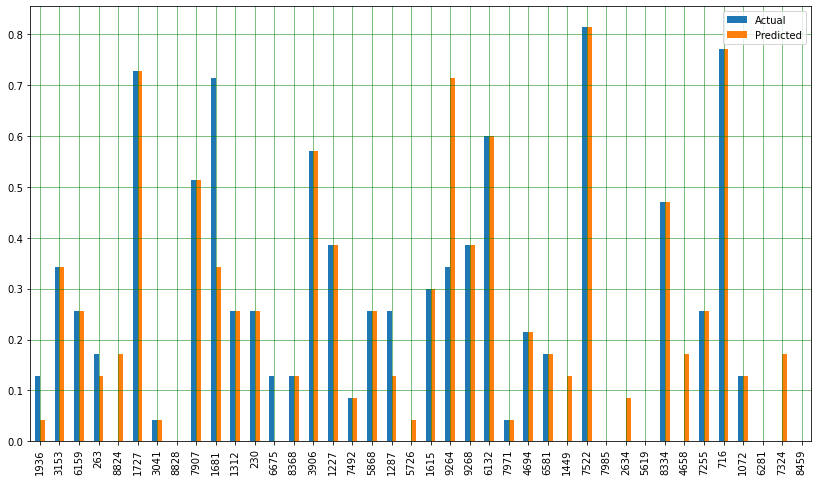

In [489]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

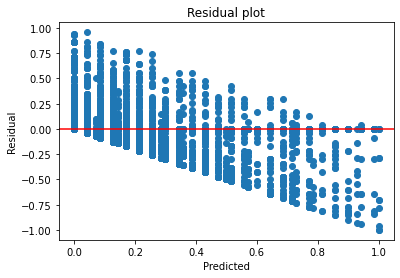

In [490]:
y_pred = dt_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [491]:
importances = list(dt_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [492]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: Latitude             Importance: 0.33
Variable: Hour                 Importance: 0.3
Variable: Longitude            Importance: 0.29
Variable: Weekend              Importance: 0.08
Variable: Weekday              Importance: 0.0


In [493]:
perm = PermutationImportance(dt_model, random_state=1).fit(X_test, y_test)
eli5.show_weights( perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.2838 ± 0.0317,Latitude
1.2073 ± 0.0331,Longitude
1.0343 ± 0.0349,Hour
0.4255 ± 0.0332,Weekend
0 ± 0.0000,Weekday


### Run a basic test

In [494]:
# example test data 
X_test = [[-73.97419882396352, 40.79478336240544, 23, 5, 0]] 
y_test = [0.72] # replace this with actual test data

In [495]:
y_pred = dt_model.predict(X_test)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [496]:
print("Predicted output:", y_pred)

Predicted output: [0.72857143]


## Final test against the more accurate Random Forest Regressor

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [498]:
rf_model = RandomForestRegressor(n_estimators = 20, random_state = 36)

In [499]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=36)

In [500]:
y_pred = rf_model.predict(X_test)

In [501]:
predictions = rf_model.predict(X_test)

In [502]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

         Actual  Predicted
0      0.000000   0.066429
1      0.471429   0.520714
2      0.000000   0.047143
3      0.642857   0.679286
4      0.000000   0.012857
...         ...        ...
10086  0.000000   0.164286
10087  0.128571   0.126429
10088  0.085714   0.137143
10089  0.042857   0.115714
10090  0.000000   0.032143

[10091 rows x 2 columns]


In [503]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [504]:
print("Random Forest - Root Mean Squared Error (RMSE):", rmse)
print("Random Forest - R-squared score:", r2)
print("Random Forest - Mean absolute error:", mae)

Random Forest - Root Mean Squared Error (RMSE): 0.12342257438310877
Random Forest - R-squared score: 0.7123623832803644
Random Forest - Mean absolute error: 0.07599898070416354


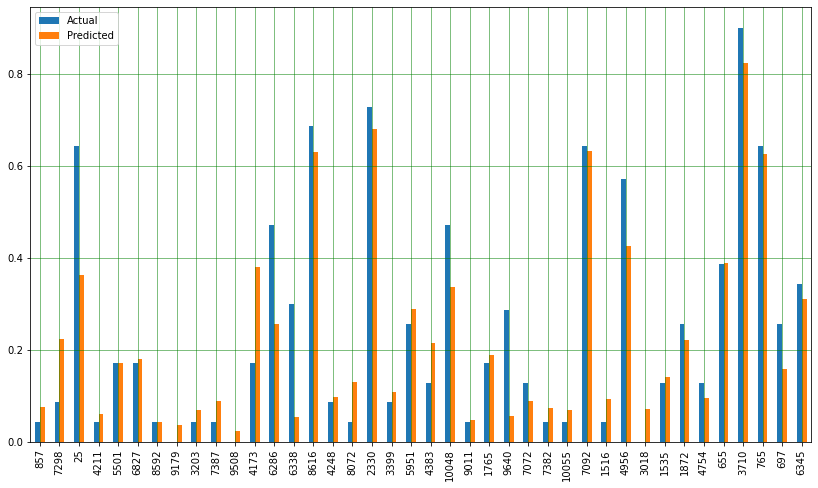

In [505]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

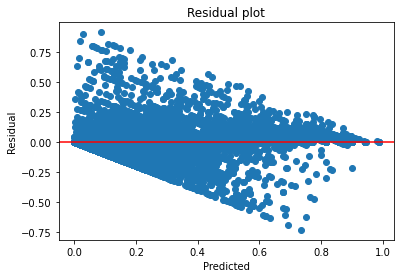

In [506]:
y_pred = rf_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [507]:
importances = list(rf_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [508]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: Latitude             Importance: 0.34
Variable: Longitude            Importance: 0.29
Variable: Hour                 Importance: 0.29
Variable: Weekend              Importance: 0.08
Variable: Weekday              Importance: 0.0


In [509]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights( perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.9512 ± 0.0235,Hour
0.7735 ± 0.0159,Latitude
0.7360 ± 0.0195,Longitude
0.3964 ± 0.0230,Weekend
0.0001 ± 0.0002,Weekday


<b> After some rigorous testing and as a group, we have decided against the Decision Tree model even though it is more optimal for runtime. Rendering the model is no longer an issue for the group as we have decided to use a database to store daily model predictions so model runtime is not necessary for us anymore. With this in mind, we have decided to return to the most accurate model to ensure the best quality routing for the web application.

## Create pkl file with RF model

In [510]:
pkl_filename = "noise_crime_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)

## Create a CSV for backend rendering

In [511]:
df

,Latitude,Longitude,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Normalized_Score
0,40.866851,-73.923590,0,1,6,1,0,76,0.171429
1,40.777176,-73.976094,0,1,6,1,0,199,0.085714
2,40.769107,-73.967053,0,1,6,1,0,96,0.000000
3,40.794830,-73.950344,0,1,6,1,0,318,0.257143
4,40.850211,-73.930339,0,1,6,1,0,439,0.000000
...,...,...,...,...,...,...,...,...,...
96134,40.722062,-73.975840,23,12,5,1,0,215,1.000000
96136,40.722421,-74.001533,23,12,5,1,0,288,0.000000
96137,40.864764,-73.922764,23,12,5,1,0,280,0.214286
96138,40.812812,-73.945739,23,12,5,1,0,197,0.428571


In [513]:
df.to_csv("Noise_Crime_Model_Data_WD:WE.csv")